In [1]:
# Customer Segmentation using K-Means Clustering

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
# Step 1: Load and inspect the dataset

# Load dataset (please ensure the CSV file is in the same directory)
dataset = pd.read_csv('Telco.csv')

# Select only the relevant features: Tenure and Monthly Charges
X = dataset[['tenure', 'MonthlyCharges']].values

In [5]:
# Display the first 5 rows of the original dataset
print("Original Sample Data:\n")
print(dataset.head())

Original Sample Data:

   gender  SeniorCitizen Dependents  tenure PhoneService MultipleLines  \
0  Female              0         No       1           No            No   
1    Male              0         No      34          Yes            No   
2    Male              0         No       2          Yes            No   
3    Male              0         No      45           No            No   
4  Female              0         No       2          Yes            No   

  InternetService        Contract  MonthlyCharges Churn  
0             DSL  Month-to-month           29.85    No  
1             DSL        One year           56.95    No  
2             DSL  Month-to-month           53.85   Yes  
3             DSL        One year           42.30    No  
4     Fiber optic  Month-to-month           70.70   Yes  


In [7]:
# Step 2: Check for missing values

print("Missing values in 'Tenure':", dataset['tenure'].isna().sum())
print("Missing values in 'MonthlyCharges':", dataset['MonthlyCharges'].isna().sum())

Missing values in 'Tenure': 0
Missing values in 'MonthlyCharges': 0


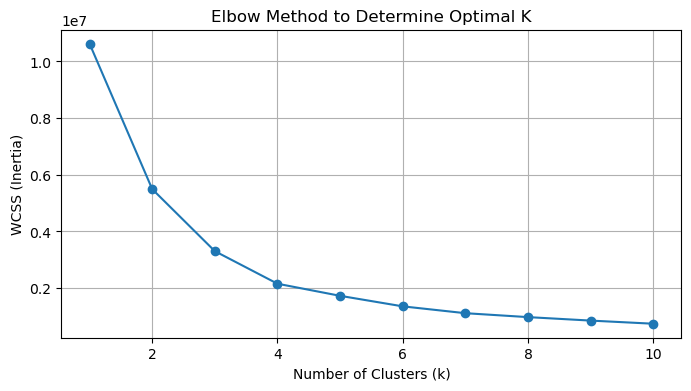

In [9]:
# Step 3: Determine optimal number of clusters using Elbow Method

wcss = []  # Within-Cluster Sum of Squares

# Try different values of k (number of clusters) from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10)  # Explicitly set n_init to suppress future warning
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

# From the plot below, we choose K = 4 based on the 'elbow' point

In [11]:
# Step 4: Apply K-Means Clustering

# Create and fit the K-Means model with 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10)
Y_Kmeans = kmeans.fit_predict(X)  # Predict the cluster for each data point

# View the first 20 predicted cluster labels
print("First 30 Cluster Assignments:\n", Y_Kmeans[:30])

First 30 Cluster Assignments:
 [3 1 3 1 0 0 0 3 0 1 3 3 2 2 0 2 1 2 3 0 3 3 3 1 1 3 2 3 2 0]


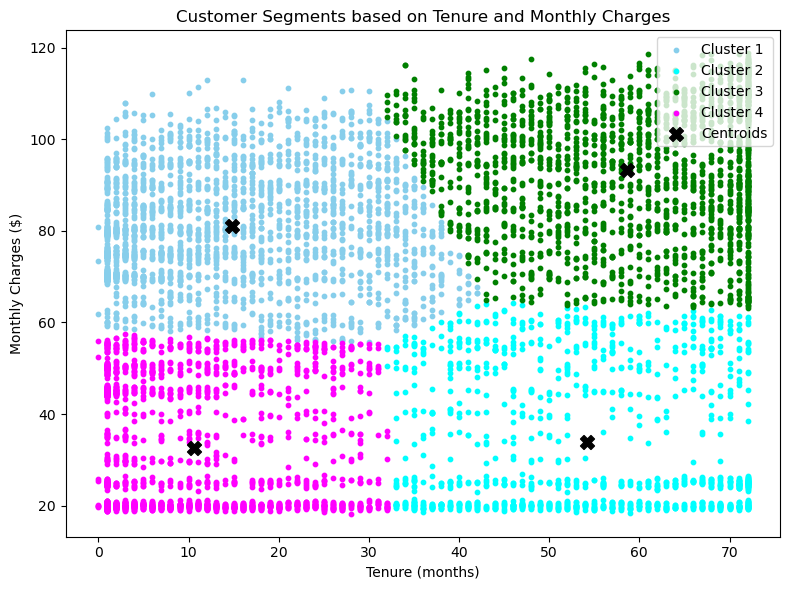

In [13]:
# Step 5: Visualize the clusters

# Plot each cluster with a unique color
plt.figure(figsize=(8, 6))
plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0, 1], s=10, c='skyblue', label='Cluster 1')
plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1, 1], s=10, c='cyan', label='Cluster 2')
plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2, 1], s=10, c='green', label='Cluster 3')
plt.scatter(X[Y_Kmeans == 3, 0], X[Y_Kmeans == 3, 1], s=10, c='magenta', label='Cluster 4')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='black', marker='X', label='Centroids')

# Add titles and axis labels
plt.title('Customer Segments based on Tenure and Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [15]:
# Model Summary and Business Application
#
# This K-Means clustering model segments customers based on their tenure with the company
# and their monthly charges. In a banking and financial environment, such segmentation 
# can help identify customer groups such as:

# - Long-term low spenders who may be candidates for loyalty rewards or upselling.
# - New high spenders who might benefit from onboarding offers or premium services.
# - At-risk customers (short tenure, low spending) who may require retention strategies.

# By understanding these customer segments, banks can tailor marketing campaigns,
# improve customer satisfaction, and increase lifetime value through more informed,
# data-driven decision-making.